In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.image import imread
from sklearn.model_selection import train_test_split

In [35]:
data = pd.read_excel("driving_log.xlsx")

In [36]:
print(data.iloc[10])

center            D:\self driving car\IMG\center_2024_01_28_12_1...
left              D:\self driving car\IMG\left_2024_01_28_12_16_...
right             D:\self driving car\IMG\right_2024_01_28_12_16...
steering_angle                                                  0.0
accelerator                                                     1.0
brake                                                           0.0
speed                                                      3.440971
Name: 10, dtype: object


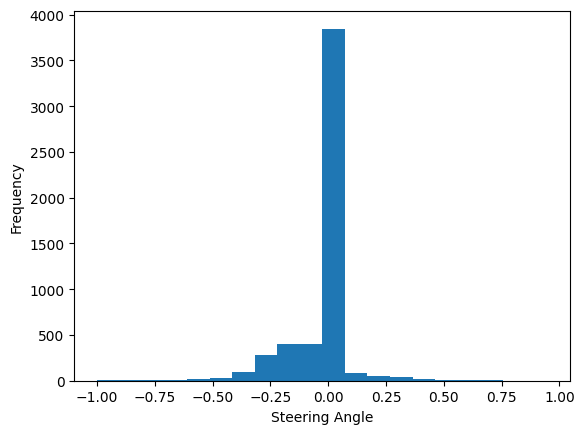

In [40]:
plt.hist(data['steering_angle'], bins=20)
plt.xlabel('Steering Angle')
plt.ylabel('Frequency')
plt.show()

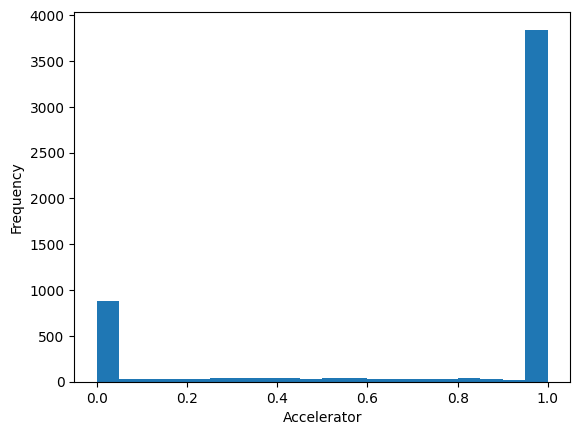

In [41]:
plt.hist(data['accelerator'], bins=20)
plt.xlabel('Accelerator')
plt.ylabel('Frequency')
plt.show()

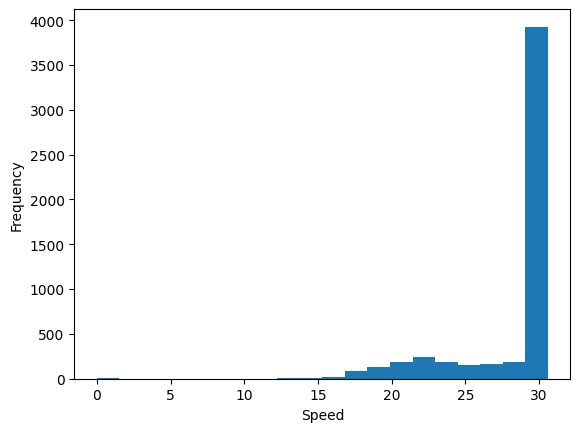

In [39]:
plt.hist(data['speed'], bins=20)
plt.xlabel('Speed')
plt.ylabel('Frequency')
plt.show()

(160, 320, 3)


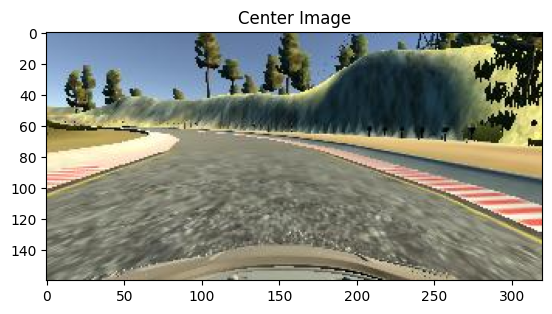

In [51]:
image_path = data['center'].iloc[0]  
# Load and display the image
image = imread(image_path)
print(image.shape)
plt.imshow(image)
plt.title('Center Image')
plt.show()

In [44]:
print(data.shape)

(5328, 7)


In [59]:
X_images = data[['left', 'center', 'right']]
y_steering = data['steering_angle']
y_accelerator = data['accelerator']
y_brake = data['brake']
y_speed = data['speed']
X_center = data['center']

# X_train, X_test, y_steering_train, y_steering_test, y_accelerator_train, y_accelerator_test, y_brake_train, y_brake_test,y_speed_train,y_speed_test = train_test_split(
#     X_images, y_steering, y_accelerator, y_brake,y_speed, test_size=0.2, random_state=42
# )
X_train, X_test, y_steering_train, y_steering_test, y_accelerator_train, y_accelerator_test, y_brake_train, y_brake_test,y_speed_train,y_speed_test = train_test_split(
    X_center, y_steering, y_accelerator, y_brake,y_speed, test_size=0.2, random_state=42 )

In [57]:
# from keras.models import Model
# from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Concatenate, InputLayer
# from keras.preprocessing.image import img_to_array, load_img


# def load_and_preprocess_image(image_path):
#     img = load_img(image_path, target_size=input_shape[:2])
#     img_array = img_to_array(img)
#     img_array = img_array / 255.0  # Normalize pixel values to be between 0 and 1
#     return img_array

# # Assuming your images are, for example, 160x320 pixels with 3 color channels (adjust these values based on your actual images)
# input_shape = (160, 320, 3)

# # Left image input
# left_input = Input(shape=input_shape, name='left_input')
# left_loaded = InputLayer(input_tensor=load_and_preprocess_image(left_input))(left_input)
# left_conv1 = Conv2D(24, (5, 5), activation='relu')(left_loaded)
# left_pool1 = MaxPooling2D((2, 2))(left_conv1)

# # Center image input
# center_input = Input(shape=input_shape, name='center_input')
# center_loaded = InputLayer(input_tensor=load_and_preprocess_image(center_input))(center_input)
# center_conv1 = Conv2D(24, (5, 5), activation='relu')(center_loaded)
# center_pool1 = MaxPooling2D((2, 2))(center_conv1)

# # Right image input
# right_input = Input(shape=input_shape, name='right_input')
# right_loaded = InputLayer(input_tensor=load_and_preprocess_image(right_input))(right_input)
# right_conv1 = Conv2D(24, (5, 5), activation='relu')(right_loaded)
# right_pool1 = MaxPooling2D((2, 2))(right_conv1)

# # Concatenate the outputs of the three branches
# merged = Concatenate()([left_pool1, center_pool1, right_pool1])

# # Flatten the merged features
# flatten = Flatten()(merged)

# # Dense layers for regression tasks (steering angle, accelerator, and brake)
# dense1 = Dense(100, activation='relu')(flatten)
# dense2 = Dense(50, activation='relu')(dense1)

# # Output layers
# steering_output = Dense(1, name='steering_output')(dense2)
# accelerator_output = Dense(1, activation='sigmoid', name='accelerator_output')(dense2)
# brake_output = Dense(1, activation='sigmoid', name='brake_output')(dense2)

# # Define the model
# model = Model(inputs=[left_input, center_input, right_input], outputs=[steering_output, accelerator_output, brake_output])

# # Compile the model with appropriate loss functions and optimizers
# model.compile(optimizer='adam', loss={'steering_output': 'mse', 'accelerator_output': 'binary_crossentropy', 'brake_output': 'binary_crossentropy'})

# # Display the model summary
# model.summary()


TypeError: path should be path-like or io.BytesIO, not <class 'keras.src.engine.keras_tensor.KerasTensor'>

In [58]:
# # Import necessary libraries
# from keras.callbacks import ModelCheckpoint

# # Assuming X_train contains 'left', 'center', and 'right' images, and y_train contains target variables
# # Also, assuming you have split your data into training and testing sets

# # Train the model
# history = model.fit(
#     {'left_input': X_train['left'], 'center_input': X_train['center'], 'right_input': X_train['right']},
#     {'steering_output': y_steering_train, 'accelerator_output': y_accelerator_train, 'brake_output': y_brake_train},
#     epochs=10,
#     batch_size=32,
#     validation_split=0.2,
#     callbacks=[
#         # Save the best model based on validation loss
#         ModelCheckpoint(filepath='best_model.h5', monitor='val_loss', save_best_only=True)
#     ]
# )

# # Evaluate the model on the test data
# evaluation = model.evaluate(
#     {'left_input': X_test['left'], 'center_input': X_test['center'], 'right_input': X_test['right']},
#     {'steering_output': y_steering_test, 'accelerator_output': y_accelerator_test, 'brake_output': y_brake_test}
# )

# # Print the evaluation results
# print("Evaluation Loss:", evaluation)


In [66]:
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense
from keras.models import Model

# Assuming your images are, for example, 160x320 pixels with 3 color channels (adjust these values based on your actual images)
input_shape = (160, 320, 3)

# Center image input
center_input = Input(shape=input_shape, name='center_input')
center_conv1 = Conv2D(24, (5, 5), activation='relu')(center_input)
center_pool1 = MaxPooling2D((2, 2))(center_conv1)

# Flatten the features
flatten = Flatten()(center_pool1)

# Dense layers for regression tasks (steering angle, accelerator, and brake)
dense1 = Dense(100, activation='relu')(flatten)
dense2 = Dense(50, activation='relu')(dense1)

# Output layers
steering_output = Dense(1, name='steering_output')(dense2)
accelerator_output = Dense(1, activation='sigmoid', name='accelerator_output')(dense2)
brake_output = Dense(1, activation='sigmoid', name='brake_output')(dense2)

# Define the model
model = Model(inputs=center_input, outputs=[steering_output, accelerator_output, brake_output])

# Compile the model with appropriate loss functions and optimizers
model.compile(optimizer='adam', 
              loss={'steering_output': 'mse', 'accelerator_output': 'binary_crossentropy', 'brake_output': 'binary_crossentropy'},
              metrics={'steering_output':'mae','accelerator_output': 'accuracy', 'brake_output': 'accuracy'}
              )

# Display the model summary
model.summary()


Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 center_input (InputLayer)   [(None, 160, 320, 3)]        0         []                            
                                                                                                  
 conv2d_4 (Conv2D)           (None, 156, 316, 24)         1824      ['center_input[0][0]']        
                                                                                                  
 max_pooling2d_4 (MaxPoolin  (None, 78, 158, 24)          0         ['conv2d_4[0][0]']            
 g2D)                                                                                             
                                                                                                  
 flatten_2 (Flatten)         (None, 295776)               0         ['max_pooling2d_4[0][0]'

In [63]:
from keras.preprocessing.image import img_to_array, load_img

def load_and_preprocess_image(image_path):
    img = load_img(image_path, target_size=input_shape[:2])
    img_array = img_to_array(img)
    img_array = img_array / 255.0  # Normalize pixel values to be between 0 and 1
    return img_array

X_train_center = np.array([load_and_preprocess_image(path) for path in X_train])

In [64]:
print(X_train_center.shape)

(4262, 160, 320, 3)


In [67]:
history = model.fit(
    X_train_center,  # Only center images
    {'steering_output': y_steering_train, 'accelerator_output': y_accelerator_train, 'brake_output': y_brake_train},
    epochs=10,
    batch_size=32,
    validation_split=0.2
)

Epoch 1/10
107/107 [==============================] - 68s 612ms/step - loss: 32.1149 - steering_output_loss: 31.3475 - accelerator_output_loss: 0.7021 - brake_output_loss: 0.0652 - val_loss: 0.4032 - val_steering_output_loss: 0.0155 - val_accelerator_output_loss: 0.3574 - val_brake_output_loss: 0.0303
Epoch 2/10
107/107 [==============================] - 65s 604ms/step - loss: 0.3342 - steering_output_loss: 0.0147 - accelerator_output_loss: 0.2828 - brake_output_loss: 0.0367 - val_loss: 0.3025 - val_steering_output_loss: 0.0152 - val_accelerator_output_loss: 0.2606 - val_brake_output_loss: 0.0268
Epoch 3/10
107/107 [==============================] - 62s 581ms/step - loss: 0.2420 - steering_output_loss: 0.0126 - accelerator_output_loss: 0.1976 - brake_output_loss: 0.0318 - val_loss: 0.2829 - val_steering_output_loss: 0.0128 - val_accelerator_output_loss: 0.2480 - val_brake_output_loss: 0.0221
Epoch 4/10
107/107 [==============================] - 62s 579ms/step - loss: 0.1827 - steering_

In [68]:
model.save('cnn_using_center_images.h5')

c:\Users\VIVEK\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


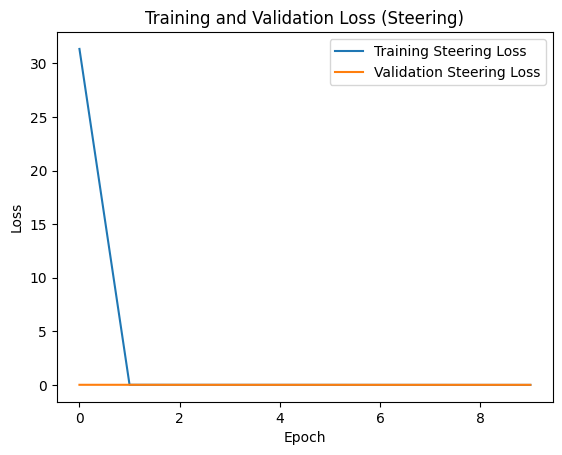

In [69]:
plt.plot(history.history['steering_output_loss'], label='Training Steering Loss')
plt.plot(history.history['val_steering_output_loss'], label='Validation Steering Loss')
plt.title('Training and Validation Loss (Steering)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [70]:
plt.plot(history.history['steering_output_accuracy'], label='Training Steering Accuracy')
plt.plot(history.history['val_steering_output_accuracy'], label='Validation Steering Accuracy')
plt.title('Training and Validation Accuracy (Steering)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

KeyError: 'steering_output_accuracy'

In [71]:
X_test_center = np.array([load_and_preprocess_image(path) for path in X_test])

In [73]:
from keras.models import load_model

model = load_model('cnn_using_center_images.h5')

evaluation = model.evaluate(
    X_test_center,  # Only center images
    {'steering_output': y_steering_test, 'accelerator_output': y_accelerator_test, 'brake_output': y_brake_test}
)

# Print the evaluation results
print("Test Loss:", evaluation[0])
print("Test Steering Loss:", evaluation[1])  # If monitoring accuracy
print("Test Accelerator Loss:", evaluation[2])  # If monitoring accuracy
print("Test Brake Loss:", evaluation[3])

34/34 [==============================] - 4s 111ms/step - loss: 0.2845 - steering_output_loss: 0.0122 - accelerator_output_loss: 0.2687 - brake_output_loss: 0.0036
Test Loss: 0.28446164727211
Test Steering Loss: 0.01220016647130251
Test Accelerator Loss: 0.26870226860046387
Test Brake Loss: 0.0035591472405940294


In [75]:
prediction = model.predict(
    X_test_center
)

34/34 [==============================] - 4s 106ms/step


In [76]:
print(prediction)

[array([[-0.37536398],
       [-0.0311614 ],
       [-0.08077842],
       ...,
       [ 0.00061738],
       [ 0.02074518],
       [-0.03340182]], dtype=float32), array([[0.00828233],
       [0.99632365],
       [0.00405144],
       ...,
       [0.99997354],
       [0.9999996 ],
       [0.9999402 ]], dtype=float32), array([[2.1457614e-04],
       [6.3303992e-07],
       [2.7046285e-03],
       ...,
       [1.8493471e-06],
       [6.2348590e-12],
       [5.2937736e-07]], dtype=float32)]
